In [20]:
using NCDatasets
using CairoMakie, Makie

In [50]:
datadir = "/home/ctroupin/data/CROCO/"
gridfile1 = joinpath(datadir, "croco_grd_nea.nc")
gridfile2 = joinpath(datadir, "croco_grd_nea.nc.1")
bulkfile1 = joinpath(datadir, "DATA_METEO/ERA5/1/LSM_Y2012M12.nc")
bulkfile2 = joinpath(datadir, "DATA_METEO/ERA5/2/LSM_Y2012M12.nc")
isfile(bulkfile2)

true

In [27]:
nc = NCDataset(gridfile1) 
    longrid1 = nc["lon_rho"][:,:]
    latgrid1 = nc["lat_rho"][:,:]
    
    @info(extrema(longrid1));
    @info(extrema(latgrid1));
close(nc)

nc = NCDataset(gridfile2) 
    longrid2 = nc["lon_rho"][:,:]
    latgrid2 = nc["lat_rho"][:,:]
    @info(extrema(longrid2));
    @info(extrema(latgrid2));
close(nc)

[ Info: (-43.79669506273935, 0.4267415267716374)
[ Info: (21.46741792431093, 50.928794837780295)
[ Info: (-19.52381662393562, -9.401122332354069)
[ Info: (24.304963066175876, 32.37593470915566)


closed Dataset

In [43]:
nc = NCDataset(bulkfile1)
    lonbulk1 = nc["lon"][:]
    latbulk1 = nc["lat"][:]
    nlon = length(lonbulk1)
    nlat = length(latbulk1)
    llon1 = reduce(vcat, (lonbulk1, lonbulk1[end] * ones(nlat), reverse(lonbulk1), lonbulk1[1] * ones(nlat)))
    llat1 = reduce(vcat, (latbulk1[1] * ones(nlon), latbulk1, latbulk1[end] * ones(nlon), reverse(latbulk1)))
close(nc)

closed Dataset

In [51]:
nc = NCDataset(bulkfile2)
    lonbulk2 = nc["lon"][:]
    latbulk2 = nc["lat"][:]
    nlon = length(lonbulk2)
    nlat = length(latbulk2)
    llon2 = reduce(vcat, (lonbulk2, lonbulk2[end] * ones(nlat), reverse(lonbulk2), lonbulk2[1] * ones(nlat)))
    llat2 = reduce(vcat, (latbulk2[1] * ones(nlon), latbulk2, latbulk2[end] * ones(nlon), reverse(latbulk2)))
close(nc)

closed Dataset

In [38]:
function get_rect(longrid, latgrid)
    
    lonrect = reduce(vcat, (longrid[1,:], longrid[:,end], longrid[end,:], longrid[:,1]))
    latrect = reduce(vcat, (latgrid[1,:], latgrid[:,end], latgrid[end,:], latgrid[:,1]));

    return lonrect, latrect
end

get_rect (generic function with 1 method)

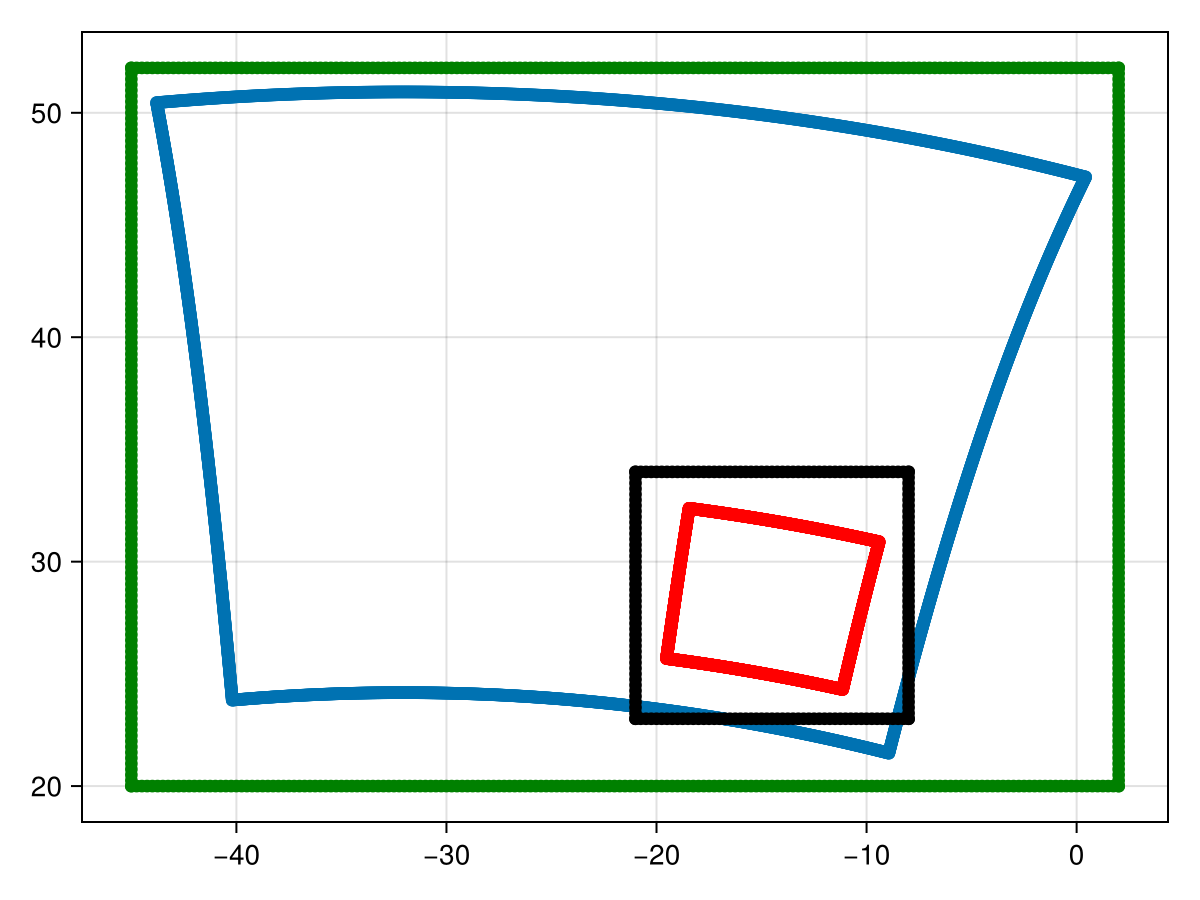

CairoMakie.Screen{IMAGE}


In [52]:
lonrect1, latrect1 = get_rect(longrid1, latgrid1)
lonrect2, latrect2 = get_rect(longrid2, latgrid2)

fig = Figure()
ax = Axis(fig[1,1])
plot!(ax, lonrect1, latrect1)
plot!(ax, lonrect2, latrect2, color="red")
plot!(ax, llon1, llat1, color="green")
plot!(ax, llon2, llat2, color="black")
display(fig)

In [35]:
lonrect

3376-element Vector{Float64}:
 -40.196778249530105
 -40.199963354631436
 -40.20315050075362
 -40.206339690856396
 -40.20953092790494
 -40.21272421486995
 -40.21591955472756
 -40.21911695045953
 -40.22231640505301
 -40.22551792150077
 -40.228721502801115
 -40.2319271519579
 -40.23513487198054
   ⋮
  -9.31488641551811
  -9.280818811811919
  -9.246756079803369
  -9.2126982242899
  -9.178645250058164
  -9.144597161884047
  -9.110553964532622
  -9.07651566275818
  -9.042482261304265
  -9.008453764903551
  -8.974430178277956
  -8.940411506138588